In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('C:\Users\Shubhanshu\Desktop\dataset_1.csv', parse_dates='Timestamp', index_col='Timestamp',date_parser=dateparse)
print data.head()

                     Unnamed: 0  Voltage_MEAN  Frequency_MEAN  \
Timestamp                                                       
2015-08-01 00:04:00           0    244.966707       49.992467   
2015-08-01 00:09:00           1    246.946993       49.924533   
2015-08-01 00:14:00           2    246.968218       49.978235   
2015-08-01 00:34:00           3    250.798191       49.960229   
2015-08-01 00:39:00           4    247.282393       49.931400   

                     Active Power_MEAN  
Timestamp                               
2015-08-01 00:04:00         888.608424  
2015-08-01 00:09:00         906.270721  
2015-08-01 00:14:00         913.466885  
2015-08-01 00:34:00          59.063705  
2015-08-01 00:39:00         769.706385  


In [3]:
ts = data['Frequency_MEAN']


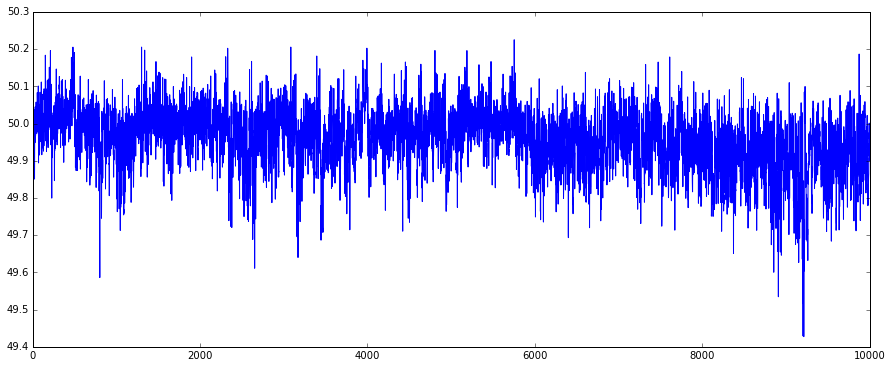

In [4]:
plt.plot(ts)

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

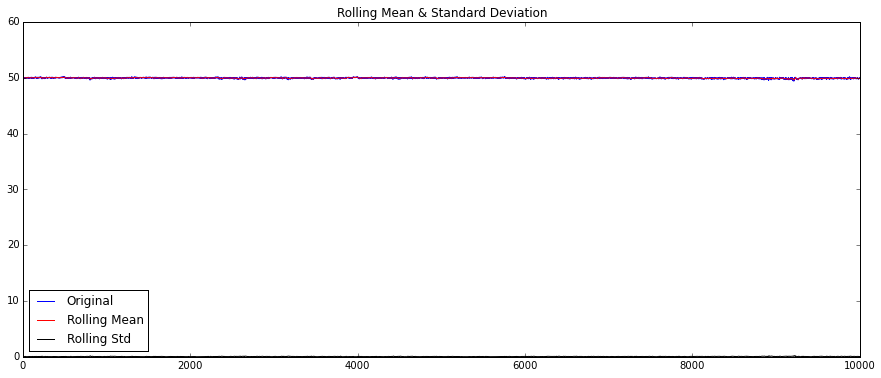

Results of Dickey-Fuller Test:
Test Statistic                -8.686780e+00
p-value                        4.142807e-14
#Lags Used                     3.600000e+01
Number of Observations Used    9.963000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [6]:
test_stationarity(ts)

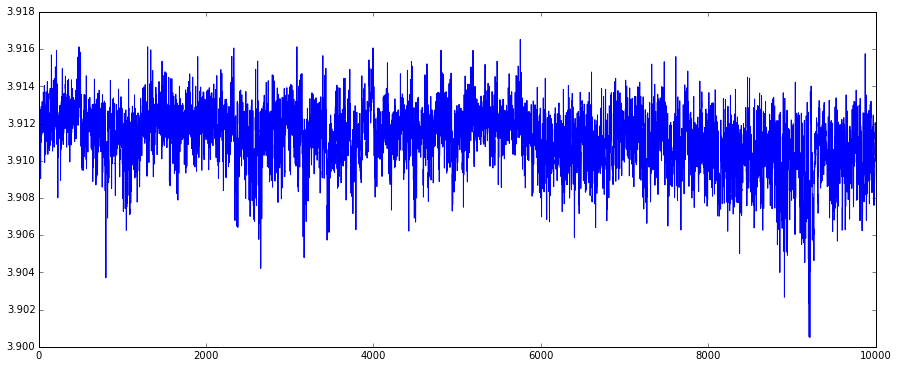

In [7]:
ts_log = np.log(ts)
plt.plot(ts_log)

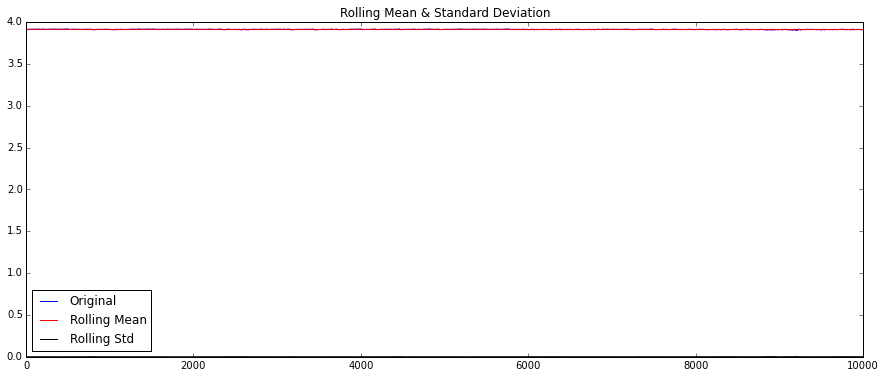

Results of Dickey-Fuller Test:
Test Statistic                -8.685985e+00
p-value                        4.162265e-14
#Lags Used                     3.600000e+01
Number of Observations Used    9.963000e+03
Critical Value (5%)           -2.861830e+00
Critical Value (1%)           -3.431007e+00
Critical Value (10%)          -2.566924e+00
dtype: float64


In [8]:
test_stationarity(ts_log)

In [9]:
ts_log.shift()

Timestamp
2015-08-01 00:04:00         NaN
2015-08-01 00:09:00    3.911872
2015-08-01 00:14:00    3.910513
2015-08-01 00:34:00    3.911588
2015-08-01 00:39:00    3.911227
2015-08-01 00:44:00    3.910650
2015-08-01 00:49:00    3.910034
2015-08-01 00:54:00    3.910490
2015-08-01 00:59:00    3.910362
2015-08-01 01:04:00    3.910956
2015-08-01 01:09:00    3.911292
2015-08-01 01:14:00    3.910997
2015-08-01 01:19:00    3.910797
2015-08-01 01:24:00    3.911359
2015-08-01 01:29:00    3.910984
2015-08-01 01:34:00    3.910874
2015-08-01 01:39:00    3.912004
2015-08-01 01:44:00    3.912768
2015-08-01 01:49:00    3.909629
2015-08-01 01:54:00    3.910742
2015-08-01 01:59:00    3.912600
2015-08-01 02:04:00    3.912701
2015-08-01 02:09:00    3.912744
2015-08-01 02:14:00    3.911357
2015-08-01 02:19:00    3.909898
2015-08-01 02:24:00    3.909037
2015-08-01 02:29:00    3.910001
2015-08-01 02:34:00    3.911695
2015-08-01 02:39:00    3.912159
2015-08-01 02:44:00    3.911297
                         ...  

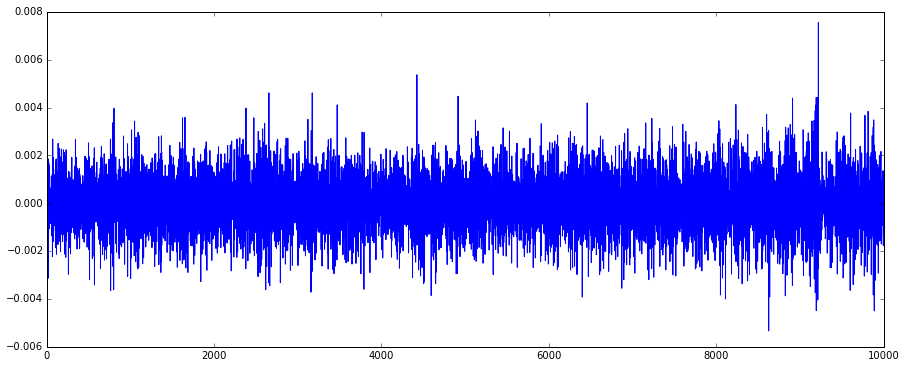

In [10]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

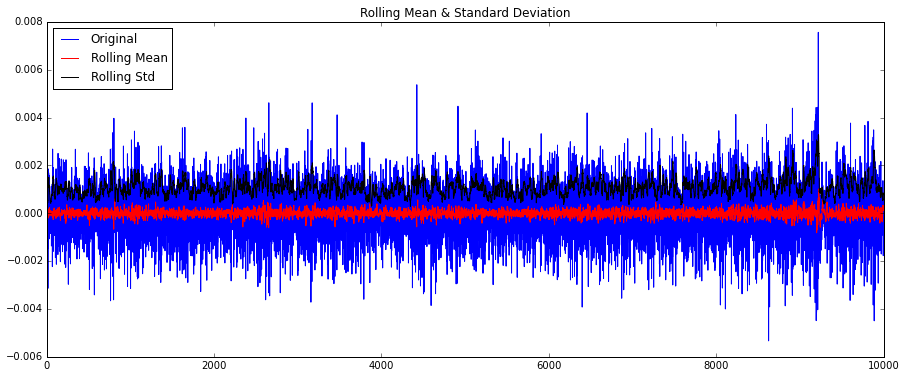

Results of Dickey-Fuller Test:
Test Statistic                  -23.861471
p-value                           0.000000
#Lags Used                       38.000000
Number of Observations Used    9960.000000
Critical Value (5%)              -2.861830
Critical Value (1%)              -3.431007
Critical Value (10%)             -2.566924
dtype: float64


In [11]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

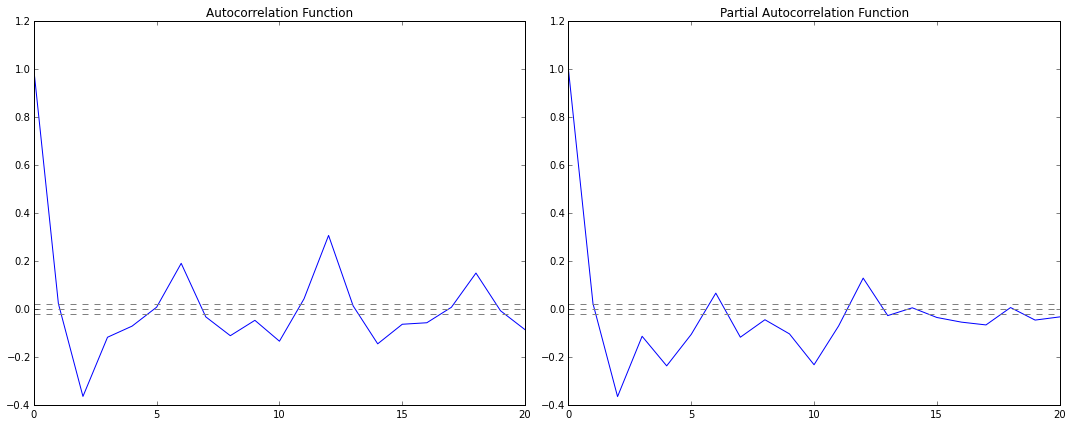

In [12]:
#Implementing the ACF and PACF plots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

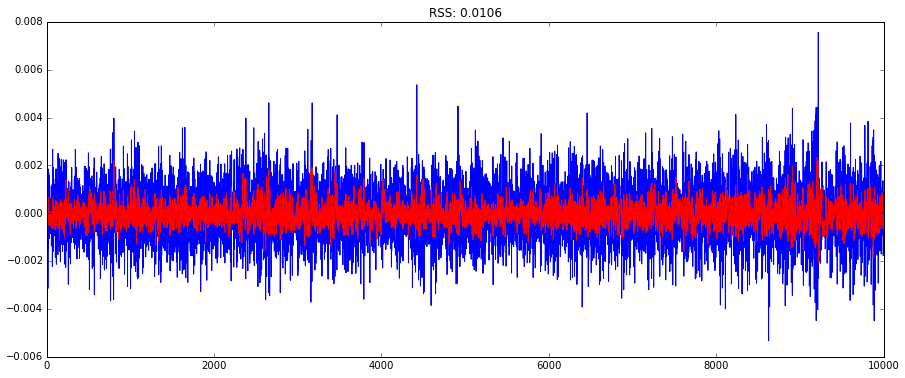

In [13]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

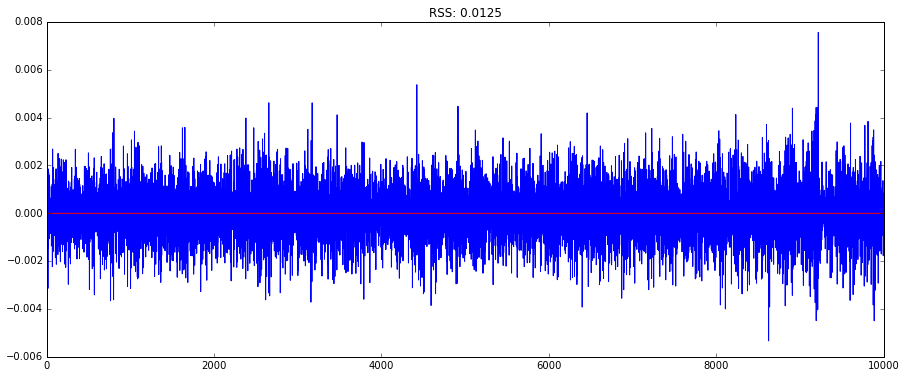

In [14]:
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

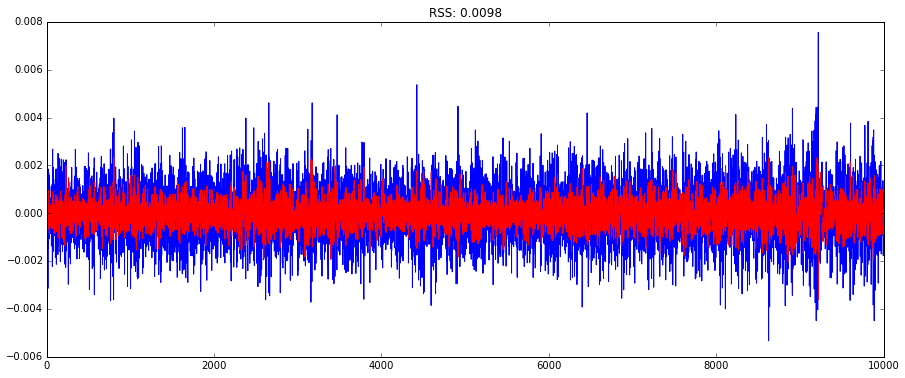

In [15]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [16]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Timestamp
2015-08-01 00:09:00   -1.334073e-07
2015-08-01 00:14:00   -9.821917e-06
2015-08-01 00:34:00    4.953679e-04
2015-08-01 00:39:00   -2.628993e-04
2015-08-01 00:44:00    3.418614e-04
dtype: float64


In [17]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Timestamp
2015-08-01 00:09:00   -1.334073e-07
2015-08-01 00:14:00   -9.955324e-06
2015-08-01 00:34:00    4.854126e-04
2015-08-01 00:39:00    2.225133e-04
2015-08-01 00:44:00    5.643747e-04
dtype: float64


In [18]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Timestamp
2015-08-01 00:04:00    3.911872
2015-08-01 00:09:00    3.911872
2015-08-01 00:14:00    3.911862
2015-08-01 00:34:00    3.912358
2015-08-01 00:39:00    3.912095
dtype: float64

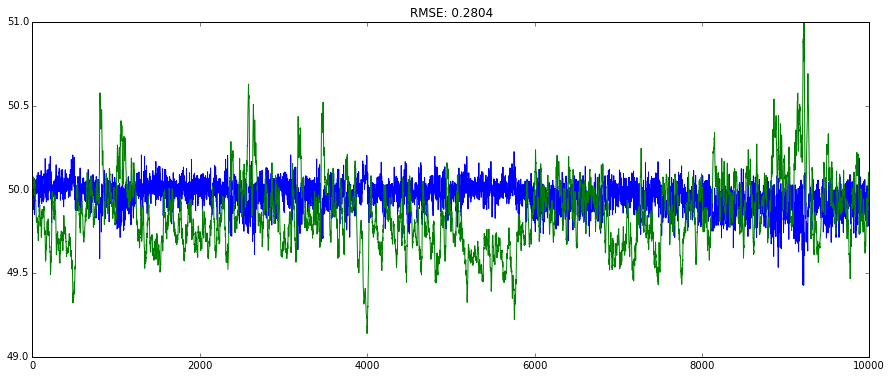

In [19]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))